# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

## Imports
All the imports are defined here

In [1]:
%matplotlib inline

import torch
import numpy as np
from torch import optim
import torchvision.utils
import torch.nn.functional as F
from torch.autograd import Variable
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,random_split

import config
from utils import imshow
from models import SiameseNetwork
from training import trainSiamese,inferenceSiamese
from datasets import SiameseNetworkDataset
from loss_functions import ContrastiveLoss

# generate_csv(config.training_dir)

import os
if not os.path.exists('state_dict'):
    os.makedirs('state_dict')

## Using Image Folder Dataset

In [2]:
siamese_dataset = SiameseNetworkDataset(training_dir=config.training_dir,
                                        training_csv=config.training_csv,
                                        transform=transforms.Compose([transforms.Resize((config.img_height,config.img_width)),
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize(0,1)
                                                                      ])
                                       ,should_invert=False)

## Visualising some of the data
The top row and the bottom row of any column is one pair. The 0s and 1s correspond to the column of the image.
1 indiciates dissimilar, and 0 indicates similar.

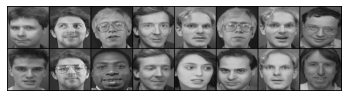

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [3]:
vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=1,
                        batch_size=8)

dataiter = iter(vis_dataloader)

example_batch = next(dataiter)

concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())

## Training Time!

In [4]:
# Split the dataset into train, validation and test sets
num_train = round(0.9*siamese_dataset.__len__())
num_validate = siamese_dataset.__len__()-num_train
siamese_train, siamese_valid = random_split(siamese_dataset, [num_train,num_validate])
train_dataloader = DataLoader(siamese_train,
                        shuffle=True,
                        num_workers=8,
                        batch_size=config.train_batch_size)
valid_dataloader = DataLoader(siamese_valid,
                        shuffle=True,
                        num_workers=8,
                        batch_size=1)

In [5]:
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = config.learning_rate )

Epoch  0  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 26.54it/s]


Epoch  0  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 233.02it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:4.39	 min:0.06	 mean:0.60	 median 0.52
-1 features max:5.27	 min:0.43	 mean:2.03	 median 1.96
Epoch-0	 Train loss: 0.2801	 Valid loss: 0.4003	 Valid error: 0.0871
Epoch  1  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.54it/s]


Epoch  1  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 216.76it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:1.91	 min:0.07	 mean:0.41	 median 0.38
-1 features max:4.25	 min:0.51	 mean:2.24	 median 2.20
Epoch-1	 Train loss: 0.0716	 Valid loss: 0.1849	 Valid error: 0.0150
new model saved
Epoch  2  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.38it/s]


Epoch  2  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 223.46it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:1.08	 min:0.08	 mean:0.36	 median 0.32
-1 features max:5.33	 min:0.83	 mean:2.72	 median 2.60
Epoch-2	 Train loss: 0.0698	 Valid loss: 0.1177	 Valid error: 0.0060
new model saved
Epoch  3  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.77it/s]


Epoch  3  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 222.03it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:1.00	 min:0.05	 mean:0.31	 median 0.28
-1 features max:5.31	 min:0.98	 mean:2.75	 median 2.61
Epoch-3	 Train loss: 0.0274	 Valid loss: 0.0914	 Valid error: 0.0030
new model saved
Epoch  4  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.70it/s]


Epoch  4  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 224.56it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:1.20	 min:0.05	 mean:0.29	 median 0.25
-1 features max:5.59	 min:0.86	 mean:2.81	 median 2.71
Epoch-4	 Train loss: 0.0199	 Valid loss: 0.0845	 Valid error: 0.0060
new model saved
Epoch  5  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.79it/s]


Epoch  5  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 228.37it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.69	 min:0.04	 mean:0.25	 median 0.23
-1 features max:5.46	 min:1.01	 mean:2.89	 median 2.81
Epoch-5	 Train loss: 0.0309	 Valid loss: 0.0593	 Valid error: 0.0000
new model saved
Epoch  6  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.25it/s]


Epoch  6  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 225.79it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.69	 min:0.04	 mean:0.25	 median 0.21
-1 features max:5.40	 min:1.02	 mean:2.90	 median 2.88
Epoch-6	 Train loss: 0.0145	 Valid loss: 0.0568	 Valid error: 0.0000
new model saved
Epoch  7  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.90it/s]


Epoch  7  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 220.60it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.78	 min:0.04	 mean:0.23	 median 0.21
-1 features max:5.42	 min:1.00	 mean:2.89	 median 2.86
Epoch-7	 Train loss: 0.0159	 Valid loss: 0.0480	 Valid error: 0.0000
new model saved
Epoch  8  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.37it/s]


Epoch  8  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 228.19it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.60	 min:0.04	 mean:0.22	 median 0.20
-1 features max:5.50	 min:1.18	 mean:2.92	 median 2.86
Epoch-8	 Train loss: 0.0227	 Valid loss: 0.0419	 Valid error: 0.0000
new model saved
Epoch  9  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.55it/s]


Epoch  9  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 219.96it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.72	 min:0.04	 mean:0.23	 median 0.20
-1 features max:5.53	 min:1.18	 mean:2.89	 median 2.83
Epoch-9	 Train loss: 0.0121	 Valid loss: 0.0474	 Valid error: 0.0000
Epoch  10  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.28it/s]


Epoch  10  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 216.23it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.68	 min:0.02	 mean:0.21	 median 0.19
-1 features max:5.40	 min:1.12	 mean:2.96	 median 2.94
Epoch-10	 Train loss: 0.0130	 Valid loss: 0.0359	 Valid error: 0.0000
new model saved
Epoch  11  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.46it/s]


Epoch  11  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 223.34it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.66	 min:0.04	 mean:0.21	 median 0.18
-1 features max:5.61	 min:1.23	 mean:3.05	 median 3.01
Epoch-11	 Train loss: 0.0309	 Valid loss: 0.0348	 Valid error: 0.0000
new model saved
Epoch  12  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.40it/s]


Epoch  12  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 223.64it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.57	 min:0.03	 mean:0.20	 median 0.18
-1 features max:5.75	 min:1.21	 mean:3.06	 median 3.03
Epoch-12	 Train loss: 0.0098	 Valid loss: 0.0318	 Valid error: 0.0000
new model saved
Epoch  13  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.64it/s]


Epoch  13  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 214.60it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.59	 min:0.03	 mean:0.20	 median 0.18
-1 features max:5.73	 min:1.28	 mean:3.04	 median 2.94
Epoch-13	 Train loss: 0.0116	 Valid loss: 0.0306	 Valid error: 0.0000
new model saved
Epoch  14  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.48it/s]


Epoch  14  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 228.54it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.74	 min:0.03	 mean:0.21	 median 0.19
-1 features max:5.53	 min:1.45	 mean:2.99	 median 2.95
Epoch-14	 Train loss: 0.0121	 Valid loss: 0.0346	 Valid error: 0.0000
Epoch  15  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.88it/s]


Epoch  15  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 229.19it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.76	 min:0.05	 mean:0.22	 median 0.20
-1 features max:5.41	 min:1.45	 mean:2.99	 median 2.90
Epoch-15	 Train loss: 0.0107	 Valid loss: 0.0374	 Valid error: 0.0000
Epoch  16  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.60it/s]


Epoch  16  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 222.79it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.72	 min:0.01	 mean:0.20	 median 0.18
-1 features max:5.26	 min:1.27	 mean:2.98	 median 2.91
Epoch-16	 Train loss: 0.0067	 Valid loss: 0.0339	 Valid error: 0.0000
Epoch  17  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 32.04it/s]


Epoch  17  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 223.08it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.68	 min:0.04	 mean:0.19	 median 0.17
-1 features max:5.81	 min:1.48	 mean:3.04	 median 2.99
Epoch-17	 Train loss: 0.0054	 Valid loss: 0.0290	 Valid error: 0.0000
new model saved
Epoch  18  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.34it/s]


Epoch  18  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 223.15it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.68	 min:0.04	 mean:0.18	 median 0.15
-1 features max:5.45	 min:1.48	 mean:3.01	 median 2.95
Epoch-18	 Train loss: 0.0061	 Valid loss: 0.0263	 Valid error: 0.0000
new model saved
Epoch  19  training


100%|███████████████████████████████████████████| 75/75 [00:02<00:00, 31.81it/s]


Epoch  19  validating


100%|████████████████████████████████████████| 333/333 [00:01<00:00, 219.87it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:0.62	 min:0.05	 mean:0.18	 median 0.15
-1 features max:5.26	 min:1.38	 mean:3.03	 median 2.97
Epoch-19	 Train loss: 0.0081	 Valid loss: 0.0265	 Valid error: 0.0000


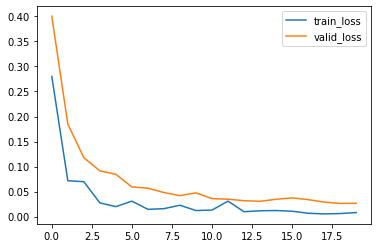

In [6]:
net, train_loss_history, valid_loss_history,dict_name = trainSiamese(net,criterion,optimizer,train_dataloader,
             valid_dataloader,config.train_number_epochs,do_show=True)

## Testing

100%|████████████████████████████████████████| 269/269 [00:01<00:00, 226.78it/s]


+1/-1 ratrio:0.50/0.50
+1 features max:2.54	 min:0.12	 mean:0.92	 median 0.65
-1 features max:3.28	 min:0.42	 mean:2.06	 median 2.32
Test loss: 0.8315	 Test error: 0.2156


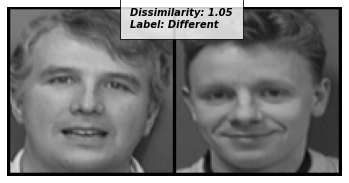

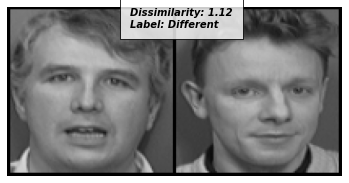

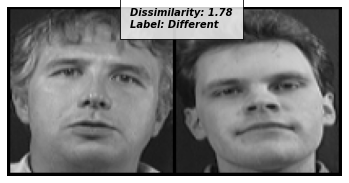

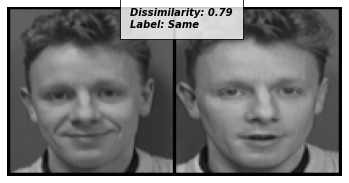

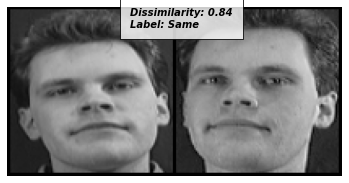

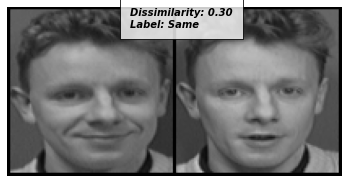

In [7]:
net = SiameseNetwork().cuda()
net.load_state_dict(torch.load(os.path.join("state_dict",dict_name)))
net.eval()

siamese_test = SiameseNetworkDataset(training_dir=config.testing_dir,
                                        training_csv=config.testing_csv,
                                        transform=transforms.Compose([transforms.Resize((config.img_height,config.img_width)),
                                                                      transforms.ToTensor(),
                                                                      transforms.Normalize(0,1)
                                                                      ])
                                       ,should_invert=False)
test_dataloader = DataLoader(siamese_test,num_workers=8,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)

test_loss, test_er = inferenceSiamese(net,criterion,test_dataloader)
print("Test loss: %.4f\t Test error: %.4f"
      %(test_loss, test_er))


for i in range(3):
    label = 0
    while label == 0:
        x0,x1,label = next(dataiter)
        label = label.detach().cpu().numpy()[0][0]

    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}\nLabel: {}'.format(euclidean_distance.item(),'Different'))

for i in range(3):
    label = 1
    while label == 1:
        x0,x1,label = next(dataiter)
        label = label.detach().cpu().numpy()[0][0]

    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0).cuda(),Variable(x1).cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    
    imshow(torchvision.utils.make_grid(concatenated),'Dissimilarity: {:.2f}\nLabel: {}'.format(euclidean_distance.item(),'Same'))

